## Importación de Bibliotecas

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder
import gensim
from nltk.corpus import stopwords
from scipy.stats import norm

In [ ]:
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train_final, y_train)

y_pred = rg.predict(X_test_final)

In [ ]:
### Visualizaciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 45404956897243.28
R^2 Score: -0.0038552058651035725


## Análisis y Modelación Supervisada 

### Carga de Datos

In [22]:
df_compras=pd.read_csv('../data/compras_df_enriched.csv')
df_compras.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,AÑO,MES,DIA,DIA_SEMANA,BENEFICIARIO_SALES,HAS_LINKEDIN_SITE
0,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED,2020,12,4,4,8,False
1,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED,2020,12,4,4,8,False
2,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED,2020,12,11,4,8,False
3,113412,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EDC011123R22,EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED,2020,12,4,4,5,False
4,113412,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EDC011123R22,EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED,2020,12,4,4,5,False


In [23]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUM BEN             1540 non-null   int64  
 1   BENEFICIARIO        1540 non-null   object 
 2   RFC                 1540 non-null   object 
 3   FACTURA             1540 non-null   object 
 4   CONTRATO            1540 non-null   object 
 5   CONCEPTO            1540 non-null   object 
 6   TIPO                1540 non-null   object 
 7   # OP                1540 non-null   float64
 8   FECHA               1540 non-null   object 
 9   IMPORTE             1540 non-null   float64
 10  SHEET               1540 non-null   object 
 11  AÑO                 1540 non-null   int64  
 12  MES                 1540 non-null   int64  
 13  DIA                 1540 non-null   int64  
 14  DIA_SEMANA          1540 non-null   int64  
 15  BENEFICIARIO_SALES  1540 non-null   int64  
 16  HAS_LI

In [24]:
print(df_compras['BENEFICIARIO'].value_counts())

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION        266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                          101
CAR ONE MONTERREY, S.A. DE C.V.                            78
PEREZ RIOS RAMIRO                                          58
S.I.M.E.P.R.O.D.E.                                         50
                                                         ... 
CELEDONIO BECERRA JUAN MIGUEL                               1
SOLUCIONES Y OPCIONES DE SEGURIDAD PRIVADA,S.A.DE C.V.      1
TOOLS & SERVICES DE MEXICO, S.A. DE C.V.                    1
TOVAR CEDILLO JAVIER ALFONSO                                1
AYALA SALAZAR GABRIEL                                       1
Name: count, Length: 301, dtype: int64


### División de Datos en Entrenamiento y Prueba

In [ ]:
X = df_compras.drop(['IMPORTE','NUM BEN'], axis=1)
y = df_compras['IMPORTE']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Codificación de Variables Categóricas

In [30]:
# 1. Definir las columnas a codificar (tomando los nombres de tu lista)
cols_to_encode = ['BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'MES', 'DIA', 'FECHA','SHEET']

# 2. Inicializar el encoder
encoder = TargetEncoder(cols=cols_to_encode)

# 3. ENTRENAR Y TRANSFORMAR el set de entrenamiento
# Usamos fit_transform con y_train
X_train_encoded = encoder.fit_transform(X_train[cols_to_encode], y_train)

# 4. SOLO TRANSFORMAR el set de prueba
# Usamos las medias aprendidas en el paso anterior, sin mirar y_test
X_test_encoded = encoder.transform(X_test[cols_to_encode])

# 5. Reemplazar en los DataFrames originales (usando join para asegurar índices)
X_train_final = X_train.drop(columns=cols_to_encode).join(X_train_encoded)
X_test_final = X_test.drop(columns=cols_to_encode).join(X_test_encoded)

### Modelación con Random Forest

In [31]:
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train_final, y_train)

y_pred = rg.predict(X_test_final)

In [34]:
### Visualizaciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 45404956897243.28
R^2 Score: -0.0038552058651035725


### Probar un modelo no supervisado o de clustering para texto

In [ ]:
import pandas as pd
import re
import gensim
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models

# 1. Configuración inicial y descarga de recursos
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

# 2. Función de preprocesamiento mejorada
def preprocess(text):
    if not isinstance(text, str): 
        return []
    # Convertir a minúsculas y quitar caracteres especiales/puntos
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    
    result = []
    for token in text.split():
        # Filtrar palabras vacías y palabras muy cortas (menores a 4 letras)
        if token not in stop_words and len(token) > 4:
            result.append(token)
    return result

# 3. Preparación de datos para el modelo LDA
# Trabajamos con los nombres únicos para definir los temas
beneficiarios_unicos = df_compras['BENEFICIARIO'].unique()
processed_docs = [preprocess(x) for x in beneficiarios_unicos]

# Crear Diccionario y Corpus
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=1, no_above=0.5) # Limpiar palabras muy comunes o muy raras
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# 4. Entrenamiento del modelo LDA
num_topics = 6
lda_model = gensim.models.LdaMulticore(
    bow_corpus, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=10, 
    workers=2,
    random_state=42
)

# Imprimir los temas encontrados para referencia
print("Temas detectados por LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

# 5. Función para asignar el tema a cada beneficiario
def get_main_topic(text):
    tokens = preprocess(text)
    bow = dictionary.doc2bow(tokens)
    # Obtener la distribución de temas para este texto
    topics = lda_model.get_document_topics(bow)
    # Ordenar por probabilidad y devolver el ID del tema más probable
    main_topic = max(topics, key=lambda x: x[1])[0]
    return main_topic

# 6. Aplicar al DataFrame original
# Esto creará una nueva columna categórica basada en el análisis de texto
df_compras['TOPIC_ID'] = df_compras['BENEFICIARIO'].apply(get_main_topic)



# --- AHORA PUEDES USAR EL TARGET ENCODER CON ESTA NUEVA COLUMNA ---

[nltk_data] Downloading package stopwords to /home/jesusr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Temas detectados por LDA:
Topic: 0 
Words: 0.034*"rodriguez" + 0.029*"gonzalez" + 0.015*"sanchez" + 0.015*"inmobiliaria" + 0.012*"maria" + 0.010*"gerardo" + 0.010*"automotriz" + 0.010*"proyectos" + 0.006*"alejandro" + 0.006*"internacionales"
Topic: 1 
Words: 0.028*"construcciones" + 0.019*"garcia" + 0.019*"gonzalez" + 0.014*"instituto" + 0.014*"infraestructura" + 0.014*"edificaciones" + 0.010*"desarrollos" + 0.010*"cantu" + 0.010*"construccion" + 0.010*"alberto"
Topic: 2 
Words: 0.022*"mexico" + 0.018*"servicios" + 0.014*"nuevo" + 0.014*"hernandez" + 0.010*"guerrero" + 0.010*"gonzalez" + 0.010*"vazquez" + 0.010*"roberto" + 0.010*"carmen" + 0.010*"universidad"
Topic: 3 
Words: 0.029*"monterrey" + 0.025*"grupo" + 0.018*"garza" + 0.017*"construcciones" + 0.017*"seguros" + 0.013*"urbanizaciones" + 0.013*"financiero" + 0.012*"maria" + 0.009*"flores" + 0.009*"servicios"
Topic: 4 
Words: 0.039*"constructora" + 0.025*"maria" + 0.014*"marcelo" + 0.014*"gomez" + 0.013*"treviño" + 0.009*"sanchez"

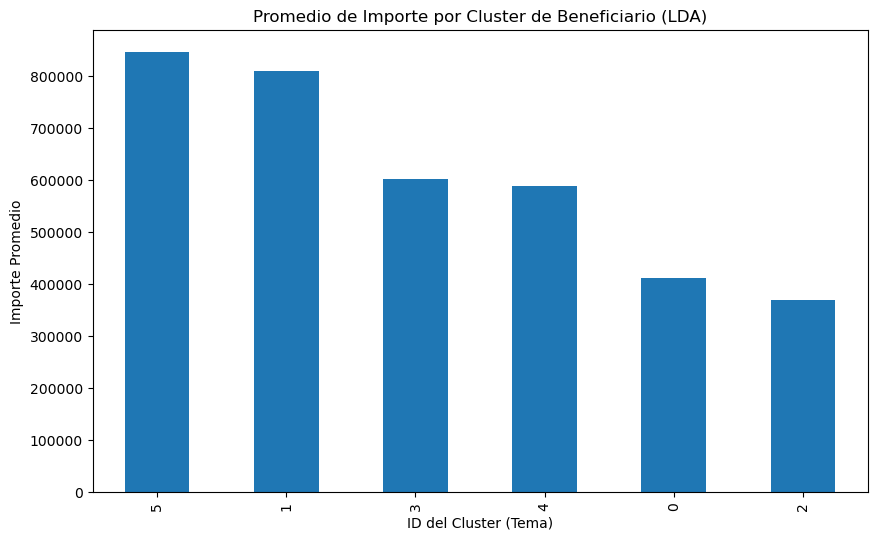

In [43]:
def get_max_topic(text):
    # Preprocesamos y convertimos a Bolsa de Palabras (BoW)
    bow = dictionary.doc2bow(preprocess(text))
    # Obtenemos la distribución de temas (lista de tuplas: [(id_tema, probabilidad), ...])
    topic_distribution = lda_model.get_document_topics(bow)
    # Retornamos el ID del tema con la probabilidad más alta
    return max(topic_distribution, key=lambda x: x[1])[0]

# 2. Creamos el mapeo para los beneficiarios únicos (para mayor eficiencia)
# Esto evita procesar la misma cadena miles de veces si se repite en el DataFrame
beneficiarios_unicos = df_compras['BENEFICIARIO'].unique()
mapa_clusters = {nombre: get_max_topic(nombre) for nombre in beneficiarios_unicos}

# 3. Asignamos el nombre del cluster al DataFrame original
df_compras['CLUSTER_NAME'] = df_compras['BENEFICIARIO'].map(mapa_clusters)

# 4. Graficamos el promedio del IMPORTE por cada cluster detectado
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_compras.groupby('CLUSTER_NAME')['IMPORTE'].mean().sort_values(ascending=False).plot.bar()
plt.title('Promedio de Importe por Cluster de Beneficiario (LDA)')
plt.xlabel('ID del Cluster (Tema)')
plt.ylabel('Importe Promedio')
plt.show()

### Probar un modelo no supervisado de anomalías en cuanto a importes

In [45]:
params = norm.fit(df_compras['IMPORTE'])
params

(np.float64(626317.9473441559), np.float64(4665396.47441213))

In [47]:
df_compras['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in df_compras['IMPORTE']]
df_compras[df_compras['PROB_TOTAL']>0.95]

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,AÑO,MES,DIA,DIA_SEMANA,BENEFICIARIO_SALES,HAS_LINKEDIN_SITE,TOPIC_ID,CLUSTER_NAME,PROB_TOTAL
111,115716,"SOLUCIONES Y OPCIONES DE SEGURIDAD PRIVADA,S.A...",SOS070816714,426-158003-5663,SPP-347-2020,50% RESTANTE POR LA ADQUISICION DE UN SISTEMA ...,TR,297000059.0,2020-12-08,1.134577e+07,CONTRATISTAS Y FDO FED,2020,12,8,1,1,True,1,1,0.989209
161,115826,"CAR ONE MONTERREY, S.A. DE C.V.",COM021025A18,DSTS3211-158003-5768,SPP-358-2020,SEGUNDO Y ULTIMO ANTICIPO DE 30% DE 77 VEHICUL...,TR,300000121.0,2020-12-18,2.172712e+07,CONTRATISTAS Y FDO FED,2020,12,18,4,78,True,3,3,0.999997
166,116217,"RED RECOLECTOR, S.A. DE C.V.",RRE9712222V9,FVRM0251125-158003-5742,SSP-157-13,RECOLECCION DE RESIDUOS NO PELIGROSOS GENERADO...,TR,302000014.0,2020-12-11,1.951267e+07,CONTRATISTAS Y FDO FED,2020,12,11,4,1,True,1,1,0.999974
168,116626,INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA...,ISA030315CN0,2865-158003-5664,SPP-354-2020,CRECIMIENTO Y AMPLIACION DE COBERTURA AL SISTE...,TR,297000058.0,2020-12-08,1.267303e+08,CONTRATISTAS Y FDO FED,2020,12,8,1,5,True,3,3,1.000000
278,123674,"PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.",PYD050930HQ2,B1572-155002-2903,SOP-996-2020,RE-2020 FDO-INF-MCIPAL EST. 1 OP-FIM17Y20-01/2...,TR,306000031.0,2020-12-28,9.612407e+06,CONTRATISTAS Y FDO FED,2020,12,28,0,3,True,4,4,0.972955
1007,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS106845-158003-5868,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000051.0,2020-12-30,9.000000e+06,GASTOS VARIOS,2020,12,30,2,2,True,1,1,0.963661
1077,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-23-2020-158004-1712,NO APLICA,FONDO SAPS 23-2020,TR,1019137.0,2020-12-11,9.071256e+06,GASTOS VARIOS,2020,12,11,4,2,True,5,5,0.964862
1078,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-24-2020-158004-1751,NO APLICA,FONDO SAPS 24-2020,TR,1019152.0,2020-12-18,9.078245e+06,GASTOS VARIOS,2020,12,18,4,2,True,5,5,0.964978
1081,126671,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",BBA130722BR7,144-153001-167,NO APLICA,APORTACIÓN MUNICIPAL AL FIDEICOMISO LA GRAN CI...,TR,1019122.0,2020-12-11,3.000000e+07,GASTOS VARIOS,2020,12,11,4,1,False,5,5,1.000000
1091,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,7.386437e+07,GASTOS VARIOS,2020,12,17,3,16,True,5,5,1.000000


In [48]:
models_sheet={}
for sheet in list(df_compras['SHEET'].unique()):
    sheet_compras = df_compras[df_compras['SHEET'] == sheet]
    params = norm.fit(sheet_compras['IMPORTE'])
    models_sheet[sheet] = norm(params[0], params[1])

In [49]:
sheet_prob = []
for i, row in df_compras.iterrows():
    sheet_prob.append(models_sheet[row['SHEET']].cdf(row['IMPORTE']))
df_compras['PROB_SHEET'] = sheet_prob

In [50]:
df_compras[df_compras['PROB_SHEET']>0.95]

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,...,AÑO,MES,DIA,DIA_SEMANA,BENEFICIARIO_SALES,HAS_LINKEDIN_SITE,TOPIC_ID,CLUSTER_NAME,PROB_TOTAL,PROB_SHEET
111,115716,"SOLUCIONES Y OPCIONES DE SEGURIDAD PRIVADA,S.A...",SOS070816714,426-158003-5663,SPP-347-2020,50% RESTANTE POR LA ADQUISICION DE UN SISTEMA ...,TR,297000059.0,2020-12-08,1.134577e+07,...,2020,12,8,1,1,True,1,1,0.989209,0.986813
161,115826,"CAR ONE MONTERREY, S.A. DE C.V.",COM021025A18,DSTS3211-158003-5768,SPP-358-2020,SEGUNDO Y ULTIMO ANTICIPO DE 30% DE 77 VEHICUL...,TR,300000121.0,2020-12-18,2.172712e+07,...,2020,12,18,4,78,True,3,3,0.999997,0.999993
166,116217,"RED RECOLECTOR, S.A. DE C.V.",RRE9712222V9,FVRM0251125-158003-5742,SSP-157-13,RECOLECCION DE RESIDUOS NO PELIGROSOS GENERADO...,TR,302000014.0,2020-12-11,1.951267e+07,...,2020,12,11,4,1,True,1,1,0.999974,0.999950
168,116626,INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA...,ISA030315CN0,2865-158003-5664,SPP-354-2020,CRECIMIENTO Y AMPLIACION DE COBERTURA AL SISTE...,TR,297000058.0,2020-12-08,1.267303e+08,...,2020,12,8,1,5,True,3,3,1.000000,1.000000
278,123674,"PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.",PYD050930HQ2,B1572-155002-2903,SOP-996-2020,RE-2020 FDO-INF-MCIPAL EST. 1 OP-FIM17Y20-01/2...,TR,306000031.0,2020-12-28,9.612407e+06,...,2020,12,28,0,3,True,4,4,0.972955,0.969020
1007,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS106845-158003-5868,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000051.0,2020-12-30,9.000000e+06,...,2020,12,30,2,2,True,1,1,0.963661,0.953737
1077,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-23-2020-158004-1712,NO APLICA,FONDO SAPS 23-2020,TR,1019137.0,2020-12-11,9.071256e+06,...,2020,12,11,4,2,True,5,5,0.964862,0.955151
1078,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-24-2020-158004-1751,NO APLICA,FONDO SAPS 24-2020,TR,1019152.0,2020-12-18,9.078245e+06,...,2020,12,18,4,2,True,5,5,0.964978,0.955287
1081,126671,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",BBA130722BR7,144-153001-167,NO APLICA,APORTACIÓN MUNICIPAL AL FIDEICOMISO LA GRAN CI...,TR,1019122.0,2020-12-11,3.000000e+07,...,2020,12,11,4,1,False,5,5,1.000000,1.000000
1091,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,7.386437e+07,...,2020,12,17,3,16,True,5,5,1.000000,1.000000


### Formulando conclusiones

* Plantear la tendencia central
* Hay historias en los outeliers
* Esfuerzate en contestar la pregunta original
* Si tu enfoque cambio, documentalo.